<a href="https://colab.research.google.com/github/Aman78695/JSON_TO_SQL_Hotel-Analysis_Pipeline/blob/main/Hotel_Data_Transformation(JSON_to_Sql)_and_Analysis_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_json('/content/dataset.json')

In [ ]:
df.head()

,pid,en_type,name,category,agg_rating,email,facilities,inventory,prices,lat,long,numberOfFeedbacks,feedback,Ftags,priceRange
0,60330,HOTEL,Royal Palace Hotel,hotel,5.0,royalpalacehotel@gmail.com,[],NaN,[],-36.64943,-18.59665,7,"[{'pid': 950009, 'lang': 'en', 'loc_id': 60330...",[],NaN
1,59888,HOTEL,Ocean View Hotel,hotel,5.0,oceanviewhotel@gmail.com,[],NaN,[],-18.59665,-15.74197,1,"[{'pid': 343722, 'lang': 'en', 'loc_id': 59888...",[],"₹1,475"
2,91560,HOTEL,Grand Plaza Hotel,hotel,5.0,grandplazahotel@gmail.com,[],11.0,[],-15.74197,33.30524,15,"[{'pid': 333842, 'lang': 'en', 'loc_id': 91560...",[],"₹6,637 - ₹7,047"
3,30409,HOTEL,Sunset View Hotel,hotel,5.0,sunsetviewhotel@gmail.com,[],6.0,[],33.30524,-67.65205,1,"[{'pid': 93565, 'lang': 'en', 'loc_id': 30409,...",[],NaN
4,27489,HOTEL,Golden Sands Hotel,hotel,3.5,goldensandshotel@gmail.com,[],12.0,[],-67.65205,-92.26539,42,"[{'pid': 976906, 'lang': 'en', 'loc_id': 27489...","[{'text': 'tree house', 'review_count': 3}, {'...","₹901 - ₹1,475"


In [ ]:
df.shape

(12, 15)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

loc_id               0
en_type              0
name                 0
category             0
agg_rating           0
lat                  0
long                 0
numberOfFeedbacks    0
feedback             0
MIN_price            0
Max_price            0
dtype: int64

From the provided data, we can identify several fields that would be interesting for the Travee team:

1. Hotel details: The dataset includes information such as the hotel name, category, aggregate rating, email, and price range. These details provide an overview of each hotel.

2. Facilities: The "facilities" field contains information about the facilities available at each hotel. However, the current dataset shows empty brackets ([]), indicating that no facilities are specified for the hotels. This could be considered an inconsistency or missing information that needs to be addressed.

3. Inventory: The "inventory" field represents the number of rooms available at each hotel. It is expressed as a numeric value. In some cases, the value is missing (NaN), indicating that the inventory information is not available for those hotels.

4. Prices: The "prices" field provides information about the pricing of the hotels. However, in the given dataset, the prices are represented as empty brackets ([]), which suggests missing or incomplete pricing information.

5. Location: The dataset includes latitude and longitude coordinates for each hotel, allowing for geographical analysis and mapping.

6. Feedback: The "feedback" column contains feedback information for each hotel, including details such as the feedback ID, language, location ID, rating, text, user, and feedback title. The feedback entries are nested within the column and need to be expanded into individual rows for easier analysis.

It is important to note that the current dataset seems to have some inconsistencies and missing information in fields like facilities and prices. These inconsistencies need to be addressed during the data transformation and cleaning process to ensure accurate analysis and meaningful insights.

### Data Cleaning and preprocessing of the main DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pid                12 non-null     int64  
 1   en_type            12 non-null     object 
 2   name               12 non-null     object 
 3   category           12 non-null     object 
 4   agg_rating         10 non-null     float64
 5   email              12 non-null     object 
 6   facilities         12 non-null     object 
 7   inventory          8 non-null      float64
 8   prices             12 non-null     object 
 9   lat                12 non-null     float64
 10  long               12 non-null     float64
 11  numberOfFeedbacks  12 non-null     int64  
 12  feedback           12 non-null     object 
 13  Ftags              12 non-null     object 
 14  priceRange         6 non-null      object 
dtypes: float64(4), int64(2), object(9)
memory usage: 1.5+ KB


- Extracting MIN_price and Max_price from priceRange column

In [ ]:
df['priceRange']=df['priceRange'].str.replace('₹','')

In [ ]:
df['priceRange']=df['priceRange'].str.replace(',','')

In [ ]:
df['priceRange'][2]

'6637 - 7047'

In [ ]:
import re

In [ ]:
int(re.findall(r'\d+', '6637 - 7047')[0])

6637

In [ ]:
df['MIN_price']=df['priceRange'].apply(lambda x:int(re.findall(r'\d+', x)[0]) if not pd.isna(x) else np.nan)

In [ ]:
df['Max_price']=df['priceRange'].apply(lambda x:int(re.findall(r'\d+', x)[1])if (not pd.isna(x) and len(re.findall(r'\d+', x)) > 1) else np.nan)

In [ ]:
df['priceRange']

0             NaN
1            1475
2     6637 - 7047
3             NaN
4      901 - 1475
5             NaN
6      819 - 1557
7             NaN
8     3196 - 4507
9     1885 - 2130
10            NaN
11            NaN
Name: priceRange, dtype: object

In [ ]:
df.drop(columns=['priceRange'],inplace=True)

In [ ]:
df.head()

,pid,en_type,name,category,agg_rating,email,facilities,inventory,prices,lat,long,numberOfFeedbacks,feedback,Ftags,MIN_price,Max_price
0,60330,HOTEL,Royal Palace Hotel,hotel,5.0,royalpalacehotel@gmail.com,[],NaN,[],-36.64943,-18.59665,7,"[{'pid': 950009, 'lang': 'en', 'loc_id': 60330...",[],NaN,NaN
1,59888,HOTEL,Ocean View Hotel,hotel,5.0,oceanviewhotel@gmail.com,[],NaN,[],-18.59665,-15.74197,1,"[{'pid': 343722, 'lang': 'en', 'loc_id': 59888...",[],1475.0,NaN
2,91560,HOTEL,Grand Plaza Hotel,hotel,5.0,grandplazahotel@gmail.com,[],11.0,[],-15.74197,33.30524,15,"[{'pid': 333842, 'lang': 'en', 'loc_id': 91560...",[],6637.0,7047.0
3,30409,HOTEL,Sunset View Hotel,hotel,5.0,sunsetviewhotel@gmail.com,[],6.0,[],33.30524,-67.65205,1,"[{'pid': 93565, 'lang': 'en', 'loc_id': 30409,...",[],NaN,NaN
4,27489,HOTEL,Golden Sands Hotel,hotel,3.5,goldensandshotel@gmail.com,[],12.0,[],-67.65205,-92.26539,42,"[{'pid': 976906, 'lang': 'en', 'loc_id': 27489...","[{'text': 'tree house', 'review_count': 3}, {'...",901.0,1475.0


- Drop Unnecessary Columns:

If certain columns are not relevant for our analysis or SQL tables, we can drop them using the drop() method.

In [ ]:
df.drop(columns=['email'],inplace=True)

In [ ]:
df.drop(columns=['inventory'],inplace=True)

In [ ]:
df.drop(columns=['Ftags'],inplace=True)

In [ ]:
df.drop(columns=['facilities'],inplace=True)

In [ ]:
df.drop(columns=['prices'],inplace=True)

- Handle Missing Values:

Identifing columns with missing values and decide on the appropriate strategy to handle them. For numeric columns like 'MIN_price' and 'Max_price', we can fill the missing values with appropriate defaults or use interpolation methods.

In [ ]:
#filling the nan values with 0
df['MIN_price']=df['MIN_price'].fillna(0)

In [ ]:
#filling the nan values with 0
df['Max_price']=df['Max_price'].fillna(0)

In [ ]:
df['agg_rating']=df['agg_rating'].fillna(0)

- Renaming the column name

In [ ]:
#renaming columns
df=df.rename(columns={'pid':'loc_id'})

- Standardize Data Formats:

If the 'feedback' column contains nested JSON data, we can consider normalizing it to have a flat structure for better analysis. We can use the pd.json_normalize() function to achieve this.

In [ ]:
pd.json_normalize(df['feedback'][0])

,pid,lang,loc_id,rating,en_type,free_text,user,feedback_title,subrating
0,950009,en,60330,5,review,The room was clean and comfortable. I had a gr...,None,Good stay good value,[]
1,175995,en,60330,5,review,The staff was friendly and helpful. They made ...,None,Excellent,[]
2,922855,en,60330,5,review,The hotel had a great rooftop bar with stunnin...,None,Excellent,[]
3,27080,en,60330,5,review,The breakfast buffet was delicious and had a g...,None,Excellent place to stay,[]
4,905095,en,60330,4,review,The location of the hotel was perfect for a be...,None,Enjoyed the Stay,[]
5,255483,en,60330,5,review,The hotel had a great gym and pool. I was able...,None,Nice place to visit,[]
6,716852,fr,60330,5,review,The breakfast buffet was delicious and had a g...,None,Une excellente surprise une fois que l'on a tr...,[]


In [ ]:
pd.json_normalize(df['feedback'][6])

,pid,lang,loc_id,rating,en_type,free_text,user,feedback_title,subrating
0,448436,en,43477,5,review,The location of the hotel was perfect for expl...,None,Nice Homestay away from Home,[]
1,544695,en,43477,5,review,The Sapphire Hotel was a great place to stay. ...,None,Truly a farm in a valley... !,"[{'name': 'Value', 'value': '5'}, {'name': 'Lo..."
2,873510,en,43477,5,review,The hotel had a great rooftop pool with stunni...,None,Great place to stay,"[{'name': 'Value', 'value': '5'}, {'name': 'Lo..."
3,768620,en,43477,5,review,The staff was friendly and helpful. They made ...,None,Nice,[]
4,609843,en,43477,5,review,The location of the hotel was perfect for a be...,None,Best place to stay.,[]
...,...,...,...,...,...,...,...,...,...
115,767682,en,43477,5,review,The location of the hotel was perfect for expl...,None,An affordable home stay with adventurous trekk...,[]
116,886320,en,43477,5,review,The hotel had a great rooftop pool with stunni...,None,An awesome stay and host on the lap of scenic ...,"[{'name': 'Location', 'value': '5'}, {'name': ..."
117,723781,en,43477,5,review,I had a great stay at the Royal Palace Hotel. ...,None,Awsome stay on a budget rate.,[]
118,575760,en,43477,5,review,The Royal Garden Hotel was a beautiful place t...,None,magnificent stay,"[{'name': 'Value', 'value': '5'}, {'name': 'Lo..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             12 non-null     int64  
 1   en_type            12 non-null     object 
 2   name               12 non-null     object 
 3   category           12 non-null     object 
 4   agg_rating         10 non-null     float64
 5   lat                12 non-null     float64
 6   long               12 non-null     float64
 7   numberOfFeedbacks  12 non-null     int64  
 8   feedback           12 non-null     object 
 9   MIN_price          12 non-null     float64
 10  Max_price          12 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.2+ KB


- Data Type Conversion:

Ensure that the data types of each column are appropriate. For example, if 'min_price' is stored as a string, we can convert it to an integer using

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc_id             12 non-null     int64  
 1   en_type            12 non-null     object 
 2   name               12 non-null     object 
 3   category           12 non-null     object 
 4   agg_rating         10 non-null     float64
 5   lat                12 non-null     float64
 6   long               12 non-null     float64
 7   numberOfFeedbacks  12 non-null     int64  
 8   feedback           12 non-null     object 
 9   MIN_price          12 non-null     float64
 10  Max_price          12 non-null     float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.2+ KB


- Data Validation and Cleaning:

Performing data validation checks to ensure the integrity of the data. For example, we can check if 'MIN_price' is always less than or equal to 'Max_price' and handle any inconsistencies accordingly.

In [ ]:
df['MIN_price']<=df['Max_price']

0      True
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
dtype: bool

### EDA on df dataframe

- What is the typical price range for hotels in the dataset?
- Are there any outliers or unusual patterns in the price distribution?

<Axes: >

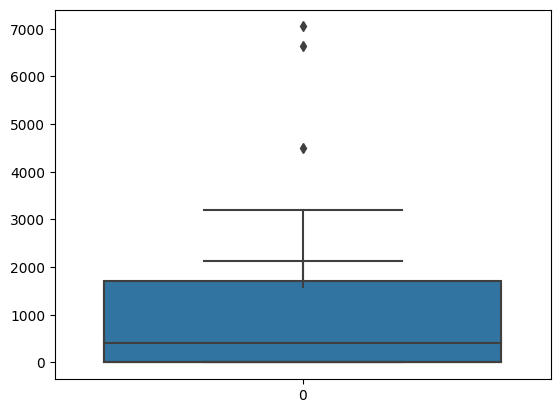

In [ ]:
sns.boxplot(df['MIN_price'])


In [ ]:
sns.boxplot(df['Max_price'])

In [ ]:
#top hotels with high rating
df[df['agg_rating']==5.0]['name']

0     Royal Palace Hotel
1       Ocean View Hotel
2      Grand Plaza Hotel
3      Sunset View Hotel
6         Sapphire Hotel
7         Paradise Hotel
10     Blue Lagoon Hotel
Name: name, dtype: object

### Data Cleaning and preprocessing in feedback table

- Dropping irrelevant columns and creating a new dataframe feedback_df

In [ ]:
new_df = pd.DataFrame()  # Create an empty DataFrame to store the normalized feedback data

for i in range(df.shape[0]):
    feedback_df = pd.json_normalize(df['feedback'][i])  # Normalize the feedback column for each row
    columns_to_drop = ['en_type', 'user', 'subrating']
    columns_exist = all(col in feedback_df.columns for col in columns_to_drop)

    if columns_exist:
        feedback_df = feedback_df.drop(columns_to_drop, axis=1)  # Drop the specified columns

    new_df = new_df.append(feedback_df, ignore_index=True)  # Append the normalized feedback data to the new DataFrame

# Print the resulting DataFrame
print(new_df)



        pid lang  loc_id rating  \
0    950009   en   60330      5   
1    175995   en   60330      5   
2    922855   en   60330      5   
3     27080   en   60330      5   
4    905095   en   60330      4   
..      ...  ...     ...    ...   
219  659558   en    9847      4   
220   13698   ru    9847      5   
221  715571   en   46638      5   
222  196236   en   46638      5   
223  218437   en   46638      5   

                                             free_text  \
0    The room was clean and comfortable. I had a gr...   
1    The staff was friendly and helpful. They made ...   
2    The hotel had a great rooftop bar with stunnin...   
3    The breakfast buffet was delicious and had a g...   
4    The location of the hotel was perfect for a be...   
..                                                 ...   
219  The hotel had a great restaurant with deliciou...   
220  The breakfast buffet was delicious and had a g...   
221  The location of the hotel was perfect for a be...   

<ipython-input-273-1c0bda3f1ad4>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(feedback_df, ignore_index=True)  # Append the normalized feedback data to the new DataFrame
<ipython-input-273-1c0bda3f1ad4>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(feedback_df, ignore_index=True)  # Append the normalized feedback data to the new DataFrame
<ipython-input-273-1c0bda3f1ad4>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(feedback_df, ignore_index=True)  # Append the normalized feedback data to the new DataFrame
<ipython-input-273-1c0bda3f1ad4>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [ ]:
feedback_df=pd.DataFrame(new_df)

In [ ]:
feedback_df.head()

,pid,lang,loc_id,rating,free_text,feedback_title,partner_attribution
0,950009,en,60330,5,The room was clean and comfortable. I had a gr...,Good stay good value,NaN
1,175995,en,60330,5,The staff was friendly and helpful. They made ...,Excellent,NaN
2,922855,en,60330,5,The hotel had a great rooftop bar with stunnin...,Excellent,NaN
3,27080,en,60330,5,The breakfast buffet was delicious and had a g...,Excellent place to stay,NaN
4,905095,en,60330,4,The location of the hotel was perfect for a be...,Enjoyed the Stay,NaN


In [ ]:
#dropping column partner_attribution
feedback_df.drop(columns=['partner_attribution'],inplace=True)

- Renaming Column

In [ ]:
#renaming column frre_text to feedback
feedback_df=feedback_df.rename(columns={'free_text':'feedback'})

### NLP Task

In [ ]:
#importing libraries
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#creating a new column which counts the no of character in each feedback
feedback_df['num_of_char']=feedback_df['feedback'].apply(lambda x: len(x))

In [ ]:
#creating a new column which counts the num of words in each feedback
feedback_df['num_of_words']=feedback_df['feedback'].apply(lambda x:len(nltk.word_tokenize(x)) if isinstance(x,str) else 0)

In [ ]:



# Check for non-null string values before applying sentence tokenizer
feedback_df['num_of_sent'] = feedback_df['feedback'].apply(lambda x: len(nltk.sent_tokenize(x)) if isinstance(x, str) else 0)


In [ ]:
feedback_df.head()

,pid,lang,loc_id,rating,feedback,feedback_title,num_of_char,num_of_words,num_of_sent
0,950009,en,60330,5,The room was clean and comfortable. I had a gr...,Good stay good value,436,91,10
1,175995,en,60330,5,The staff was friendly and helpful. They made ...,Excellent,440,90,10
2,922855,en,60330,5,The hotel had a great rooftop bar with stunnin...,Excellent,377,81,8
3,27080,en,60330,5,The breakfast buffet was delicious and had a g...,Excellent place to stay,440,88,9
4,905095,en,60330,4,The location of the hotel was perfect for a be...,Enjoyed the Stay,413,86,8


In [ ]:
#checking columns
feedback_df.columns

Index(['pid', 'lang', 'loc_id', 'rating', 'feedback', 'feedback_title',
       'num_of_char', 'num_of_words', 'num_of_sent'],
      dtype='object')

In [ ]:

#converting in lower character
feedback_df['feedback']=feedback_df['feedback'].str.lower()

In [ ]:

#word tokenization
feedback_df['feedback']=feedback_df['feedback'].apply(lambda x:nltk.word_tokenize(x))

In [ ]:
#importing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
Stpwrds=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:

#removing stopwords
feedback_df['feedback']=feedback_df['feedback'].apply(lambda x:[word for word in x if word not in Stpwrds])

In [ ]:
#removing punctuation
feedback_df['feedback']=feedback_df['feedback'].apply(lambda x:[word for word in x if word not in string.punctuation])

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lematizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#lemmatzation
feedback_df['feedback']=feedback_df['feedback'].apply(lambda x:[lematizer.lemmatize(word) for word in x ])

In [ ]:
#converting list of words into strings
feedback_df['feedback']=feedback_df['feedback'].apply(lambda x:" ".join(x))

In [ ]:
feedback_df.head()

,pid,lang,loc_id,rating,feedback,feedback_title,num_of_char,num_of_words,num_of_sent
0,950009,en,60330,5,room clean comfortable great night 's sleep st...,Good stay good value,436,91,10
1,175995,en,60330,5,staff friendly helpful made sure everything ne...,Excellent,440,90,10
2,922855,en,60330,5,hotel great rooftop bar stunning view city eme...,Excellent,377,81,8
3,27080,en,60330,5,breakfast buffet delicious good variety option...,Excellent place to stay,440,88,9
4,905095,en,60330,4,location hotel perfect beach vacation beach sh...,Enjoyed the Stay,413,86,8


In [ ]:
feedback_df.columns

Index(['pid', 'lang', 'loc_id', 'rating', 'feedback', 'feedback_title',
       'num_of_char', 'num_of_words', 'num_of_sent'],
      dtype='object')

### WordCloud

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
#wordcloud for spam
spam_wc=wc.generate(feedback_df['feedback'].str.cat(sep=" "))

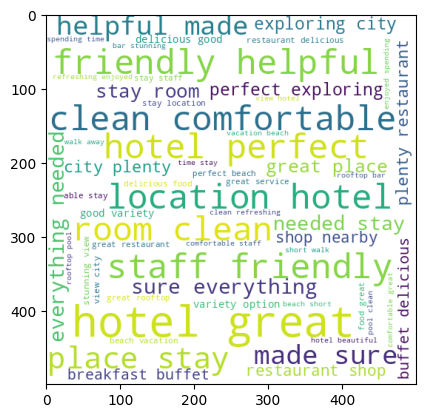

In [ ]:
plt.imshow(spam_wc)

### Exporting data to sql database

In [ ]:
import pandas as pd
import sqlite3

#  preprocessed and cleaned data stored in a pandas DataFrame named 'feedback_df'

# Create a connection to the SQLite database
conn = sqlite3.connect('hotels.db')

# Convert the DataFrame to an SQL table
df.to_sql('hotel_data', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()


In [ ]:
import pandas as pd
import sqlite3

#  preprocessed and cleaned data stored in a pandas DataFrame named 'feedback_df'

# Create a connection to the SQLite database
conn = sqlite3.connect('hotels.db')

# Convert the DataFrame to an SQL table
feedback_df.to_sql('hotel_feedback', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()